# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
# Code Here
import pandas as pd
!pip install palmerpenguins
from palmerpenguins import load_penguins
import numpy as np

df = load_penguins()
df = df.dropna().copy()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [2]:
# dummify all variables that require this
species_dummies = pd.get_dummies(df['species'], prefix='species')
island_dummies = pd.get_dummies(df['island'], prefix='island')
sex_dummies = pd.get_dummies(df['sex'], prefix='sex')
df = pd.concat([df, species_dummies, island_dummies, sex_dummies], axis=1)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,True,False,False,False,False,True,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,True,False,False,False,False,True,True,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,True,False,False,False,False,True,True,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,True,False,False,False,False,True,True,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,True,False,False,False,False,True,False,True


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

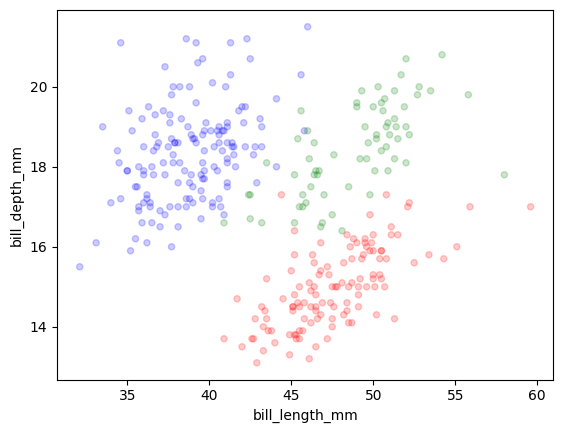

In [3]:
# Code Here
colors = df['species'].map({
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'red'
})

df.plot.scatter(x='bill_length_mm', y='bill_depth_mm', c=colors,
                alpha=.2);


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

X_train = df[['bill_length_mm', 'bill_depth_mm']]
y_train = df['species']

X_train_sc = (X_train - X_train.mean()) / X_train.std()


In [8]:
# now create a series
x_new = pd.Series()
x_new['bill_length_mm'] = 40
x_new['bill_depth_mm'] = 18

x_new_sc = (x_new - X_train.mean()) / X_train.std()
x_new_sc

,0
bill_length_mm,-0.730122
bill_depth_mm,0.424091


In [10]:
# calculate the euclidean distance

import numpy as np
dists = np.sqrt(((X_train_sc - x_new_sc) ** 2).sum(axis=1))
dists_sorted = dists.sort_values()
dists_sorted

,0
2,0.054858
139,0.074754
93,0.089044
27,0.104586
32,0.136654
...,...
253,2.951485
307,2.960423
339,3.030330
293,3.293044


In [11]:
# the first 10 entries of this sorted list will be the 10 nearest neighbors.
# get their index
inds_nearest = dists_sorted.index[:10]
inds_nearest

Index([2, 139, 93, 27, 32, 112, 50, 91, 71, 63], dtype='int64')

In [12]:
# look up the indices in the original data
df.loc[inds_nearest]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,True,False,False,False,False,True,True,False
139,Adelie,Dream,39.7,17.9,193.0,4250.0,male,2009,True,False,False,False,True,False,False,True
93,Adelie,Dream,39.6,18.1,186.0,4450.0,male,2008,True,False,False,False,True,False,False,True
27,Adelie,Biscoe,40.5,17.9,187.0,3200.0,female,2007,True,False,False,True,False,False,True,False
32,Adelie,Dream,39.5,17.8,188.0,3300.0,female,2007,True,False,False,False,True,False,True,False
112,Adelie,Biscoe,39.7,17.7,193.0,3200.0,female,2009,True,False,False,True,False,False,True,False
50,Adelie,Biscoe,39.6,17.7,186.0,3500.0,female,2008,True,False,False,True,False,False,True,False
91,Adelie,Dream,41.1,18.1,205.0,4300.0,male,2008,True,False,False,False,True,False,False,True
71,Adelie,Torgersen,39.7,18.4,190.0,3900.0,male,2008,True,False,False,False,False,True,False,True
63,Adelie,Biscoe,41.1,18.2,192.0,4050.0,male,2008,True,False,False,True,False,False,False,True


As a reasonable check, notice that these observations all have a clump thickness near 6 and a uniformity of cell size near 7. To make a prediction for the new mass, we need to count up how many there were among these 10-nearest neighbors.

In [13]:
df.loc[inds_nearest]['species'].value_counts()

,count
species,
Adelie,10


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

# define a pipeline
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=10)
)

# fit the pipeline (using X_train and y_train defined above)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])

In [ ]:
# compare the code above to what we have seen previously for k-nearest neighbors regression
# the only difference is that KNeighborsClassifier replaces
# KNeighborsRegressor.
# Now that we have fit the model we can use it to predict the class
# of a new dimensions

In [16]:
#define the test data (recall that scikit-learn expects a 2D-array)
pipeline.predict([[40,18]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['Adelie'], dtype=object)

The species is predicted to be of Adelie species. For classification models, there is an additional method, .predict_proba(), that returns the predicted probability of each class.

In [17]:
pipeline.predict_proba([[40,18]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [18]:
pipeline.predict(X_train)

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'A

In [20]:
#the predicted probabilities in each class for each observation in the training data
pipeline.predict_proba(X_train)

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.9, 0.1, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.7, 0.3, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.9, 0.1, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.9, 0.1, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. 

In [21]:
# for the training data, we can compare the predicted classes to the actual classes
pd.crosstab(y_train, pd.Series(pipeline.predict(X_train), name='predicted'))

predicted,Adelie,Chinstrap,Gentoo
species,,,
Adelie,139,1,6
Chinstrap,5,51,1
Gentoo,0,12,107


In [22]:
# evaluating classification models
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

X_train = df[["bill_length_mm", "bill_depth_mm"]]
y_train = df["species"]

# define a pipeline
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=10)
)

# fit the pipeline (using X_train and y_train defined above)
pipeline.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])

In [24]:
# calculate the model's predictions on the training data
# compare to the actual labels in the training data

y_train_ = pd.Series(pipeline.predict(X_train), name='predicted')
pd.crosstab(y_train, y_train_, margins=True)

predicted,Adelie,Chinstrap,Gentoo,All
species,,,,
Adelie,139,1,6,146
Chinstrap,5,51,1,57
Gentoo,0,12,107,119
All,144,64,114,322


In [25]:
# the two way table is the confusion matrix which can also be computed using scikit-learn
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_)


array([[145,   1,   0],
       [  5,  62,   1],
       [  0,   3, 116]])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_)

0.96996996996997

In [27]:
true_positives = ((y_train == 'Adelie') & (y_train_ == 'Adelie')).sum()
precision = true_positives / (y_train_ =='Adelie').sum()
recall = true_positives/(y_train == 'Adelie').sum()

precision, recall

(np.float64(0.9266666666666666), np.float64(0.952054794520548))

In [28]:
# precision-recall curves
probas_ = pipeline.predict_proba(X_train)
probas_

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.9, 0.1, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.7, 0.3, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.9, 0.1, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.9, 0.1, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. 

In [30]:
from sklearn.metrics import precision_score, recall_score

# y_train_ was defined in the previous cell as (probas_[:, 1] >= 0.4),
# which corresponds to binary predictions for the 'Chinstrap' class (at index 1).
y_true_chinstrap = (y_train == 'Chinstrap')
y_pred_chinstrap = y_train_

# Calculate precision and recall for the 'Chinstrap' class
precision_chinstrap = precision_score(y_true_chinstrap, y_pred_chinstrap)
recall_chinstrap = recall_score(y_true_chinstrap, y_pred_chinstrap)

(precision_chinstrap, recall_chinstrap)

(0.9154929577464789, 0.9558823529411765)

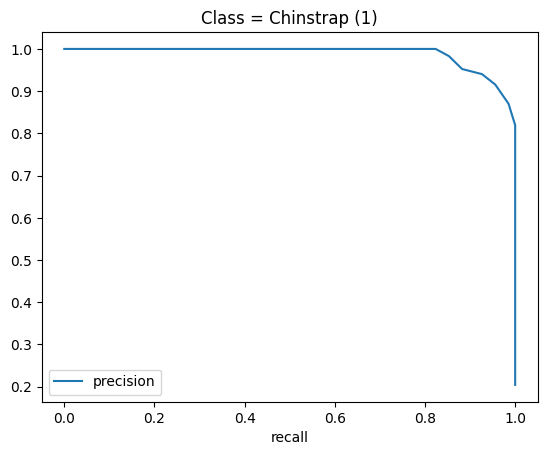

In [31]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_true_chinstrap, probas_[:, 1])

pd.DataFrame({'precision': precisions, 'recall': recalls
              }).plot.line(x='recall', y='precision', title="Class = Chinstrap (1)");


In [32]:
2 * precision * recall / (precision + recall)

np.float64(0.939189189189189)

In [34]:
from sklearn.metrics import f1_score

# y_train_ was defined earlier as the predictions from the pipeline
# We need to create boolean arrays for the 'Chinstrap' class for both true and predicted labels
y_true_chinstrap = (y_train == 'Chinstrap')
y_pred_chinstrap = (pd.Series(pipeline.predict(X_train), name='predicted') == 'Chinstrap')

f1_score_chinstrap = f1_score(y_true_chinstrap, y_pred_chinstrap)

print(f"F1 Score for Chinstrap: {f1_score_chinstrap}")

F1 Score for Chinstrap: 0.9253731343283582


In [36]:
2 * precision * recall / (precision + recall)

np.float64(0.939189189189189)

In [37]:
f1_score(y_train == 1, y_train_ == 1)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [ ]:
#Two decision tree models (for different complexities of trees)


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Create the feature matrix X
X_columns = [
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm',
    'body_mass_g',
    'year',
    'island_Biscoe',
    'island_Dream',
    'island_Torgersen',
    'sex_female',
    'sex_male'
]
X = df[X_columns]

# 2. Create the target vector y
y = df['species']

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [50]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier with low complexity
dt_model_low_complexity = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the model to the training data
dt_model_low_complexity.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, random_state=42)

In [51]:
from sklearn.metrics import classification_report

# Generate a classification report for the low-complexity model
report_low_complexity = classification_report(y_test, y_pred_low_complexity)


In [44]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set using the high-complexity model
y_pred_high_complexity = dt_model_high_complexity.predict(X_test)

# Compute the confusion matrix for the high-complexity model
conf_matrix_high_complexity = confusion_matrix(y_test, y_pred_high_complexity)

print("Confusion Matrix for High-Complexity Decision Tree Model:")
print(conf_matrix_high_complexity)

Confusion Matrix for High-Complexity Decision Tree Model:
[[41  3  0]
 [ 0 20  0]
 [ 2  0 34]]


In [52]:
from sklearn.metrics import classification_report

# Generate a classification report for the high-complexity model
report_high_complexity = classification_report(y_test, y_pred_high_complexity)

print("Classification Report for High-Complexity Decision Tree Model:")
print(report_high_complexity)

Classification Report for High-Complexity Decision Tree Model:
              precision    recall  f1-score   support

      Adelie       0.95      0.93      0.94        44
   Chinstrap       0.87      1.00      0.93        20
      Gentoo       1.00      0.94      0.97        36

    accuracy                           0.95       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.95      0.95      0.95       100

